# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dhimas Fauzan Al Asri
- **Email:** d1041221036@student.untan.ac.id
- **ID Dicoding:** [dhimas_fauzanbangkit]

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor-faktor lingkungan dapat mempengaruhi penyewaan sepeda secara harian?
- Apakah ada pola peminjaman terkait pada pola jam tertentu per hari nya ?

## Import Semua Packages/Library yang Digunakan

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv('Data\day.csv')
day_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_8220\2696812513.py:1: SyntaxWarning: invalid escape sequence '\d'
  day_df = pd.read_csv('Data\day.csv')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv('Data\hour.csv')
hour_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\hp\AppData\Local\Temp\ipykernel_8220\808769296.py:1: SyntaxWarning: invalid escape sequence '\h'
  hour_df = pd.read_csv('Data\hour.csv')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
-Pada kedua tabel diatas , features yang dimiliki hampir sama, yang membedakan hanya pada tabel hour_df yang memiliki kolom hr untuk menunjukan jam di hari itu
-

### Assessing Data

Menilai Tabel day_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
print('Jumlah Data Null/NaN = ' ,day_df.isna().sum())

Jumlah Data Null/NaN =  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
print('Jumlah Data Duplikat = ' ,day_df.duplicated().sum())

Jumlah Data Duplikat =  0


In [11]:
numeric_columns_day = day_df.select_dtypes(include=[np.number])

In [12]:
for column in numeric_columns_day.columns:
    q25, q75 = np.percentile(day_df[column], 25), np.percentile(day_df[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Cari outlier di bawah minimum dan di atas maksimum
    outliers = day_df[(day_df[column] < minimum) | (day_df[column] > maximum)]

    print(f"Outliers di {column}: \n {outliers[column]}")

Outliers di instant: 
 Series([], Name: instant, dtype: int64)
Outliers di season: 
 Series([], Name: season, dtype: int64)
Outliers di yr: 
 Series([], Name: yr, dtype: int64)
Outliers di mnth: 
 Series([], Name: mnth, dtype: int64)
Outliers di holiday: 
 16     1
51     1
104    1
149    1
184    1
247    1
282    1
314    1
327    1
359    1
366    1
380    1
415    1
471    1
513    1
550    1
611    1
646    1
681    1
691    1
724    1
Name: holiday, dtype: int64
Outliers di weekday: 
 Series([], Name: weekday, dtype: int64)
Outliers di workingday: 
 Series([], Name: workingday, dtype: int64)
Outliers di weathersit: 
 Series([], Name: weathersit, dtype: int64)
Outliers di temp: 
 Series([], Name: temp, dtype: float64)
Outliers di atemp: 
 Series([], Name: atemp, dtype: float64)
Outliers di hum: 
 49    0.187917
68    0.000000
Name: hum, dtype: float64
Outliers di windspeed: 
 44     0.417908
49     0.507463
93     0.385571
94     0.388067
292    0.422275
382    0.415429
407    0.

In [13]:
day_df_desc = day_df.describe(include='all')
day_df_desc

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Menilai Tabel hour_df

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
print('Jumlah Data Null/NaN = ' ,hour_df.isna().sum())

Jumlah Data Null/NaN =  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [16]:
print('Jumlah Data Duplikat = ' ,hour_df.duplicated().sum())

Jumlah Data Duplikat =  0


In [17]:
numeric_columns_hour = hour_df.select_dtypes(include=[np.number])

In [18]:
for column in numeric_columns_hour.columns:
    q25, q75 = np.percentile(hour_df[column], 25), np.percentile(hour_df[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Cari outlier di bawah minimum dan di atas maksimum
    outliers = hour_df[(hour_df[column] < minimum) | (hour_df[column] > maximum)]

    print(f"Outliers di {column}: \n {outliers[column]}")

Outliers di instant: 
 Series([], Name: instant, dtype: int64)
Outliers di season: 
 Series([], Name: season, dtype: int64)
Outliers di yr: 
 Series([], Name: yr, dtype: int64)
Outliers di mnth: 
 Series([], Name: mnth, dtype: int64)
Outliers di hr: 
 Series([], Name: hr, dtype: int64)
Outliers di holiday: 
 372      1
373      1
374      1
375      1
376      1
        ..
17230    1
17231    1
17232    1
17233    1
17234    1
Name: holiday, Length: 500, dtype: int64
Outliers di weekday: 
 Series([], Name: weekday, dtype: int64)
Outliers di workingday: 
 Series([], Name: workingday, dtype: int64)
Outliers di weathersit: 
 585     4
8854    4
9123    4
Name: weathersit, dtype: int64
Outliers di temp: 
 Series([], Name: temp, dtype: float64)
Outliers di atemp: 
 Series([], Name: atemp, dtype: float64)
Outliers di hum: 
 1551    0.0
1552    0.0
1553    0.0
1554    0.0
1555    0.0
1556    0.0
1557    0.0
1558    0.0
1559    0.0
1560    0.0
1561    0.0
1562    0.0
1563    0.0
1564    0.0
15

In [19]:
hour_df_desc = hour_df.describe(include='all')
hour_df_desc

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Pada Tabel day_df , tidak memiliki data duplikat maupun data NaN
- Pada Tabel hour_df , juga tidak memiliki data duplikat maupun data Nan
- Pada Tabel day_df , terdapat outliers pada colomn Holiday,Hum,Windspeed , dan Casual
-Pada Tabel hour_df , terdapat outliers pada column Holiday , Hum , Windspeed, casual, registered, dan cnt

### Cleaning Data

BERSIHKAN DATA day_df

REMOVE OUTLIERS DARI TIAP TABLE

In [20]:
def remove_outliers_iqr(df, column):
    Q1 = np.percentile(df[column], 25)  # Kuartil 1
    Q3 = np.percentile(df[column], 75)  # Kuartil 3
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    return df[~((df[column] < batas_bawah) | (df[column] > batas_atas))]

REMOVE OUTLIERS UNTUK TABEL day_df

In [21]:
day_df_cleaned = remove_outliers_iqr(day_df, 'hum')
day_df_cleaned = remove_outliers_iqr(day_df_cleaned, 'windspeed')
day_df_cleaned = remove_outliers_iqr(day_df_cleaned, 'casual')


REMOVE DATA OUTLIER UNTUK TABEL hour_df

In [22]:
hour_df_cleaned = remove_outliers_iqr(hour_df, 'hum')
hour_df_cleaned = remove_outliers_iqr(hour_df_cleaned, 'windspeed')
hour_df_cleaned = remove_outliers_iqr(hour_df_cleaned, 'casual')
hour_df_cleaned = remove_outliers_iqr(hour_df_cleaned, 'registered')
hour_df_cleaned = remove_outliers_iqr(hour_df_cleaned, 'cnt')
hour_df_cleaned = remove_outliers_iqr(hour_df_cleaned, 'atemp')

MELIHAT DATA PADA TIAP TABEL SETELAH DI BERSIHKAN

In [23]:
day_df_cleaned.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,676.000000,676,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
unique,NaN,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,358.355030,NaN,2.505917,0.476331,6.559172,0.026627,2.958580,0.724852,1.405325,0.489558,0.469260,0.633115,0.186731,745.822485,3628.752959,4374.575444
std,212.140732,NaN,1.122812,0.499809,3.504206,0.161111,1.933272,0.446919,0.548318,0.184937,0.164443,0.140229,0.072371,531.970237,1576.370496,1862.966924
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,175.750000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.329167,0.326382,0.525059,0.134177,304.750000,2481.750000,3070.250000
50%,349.500000,NaN,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.481667,0.470633,0.631250,0.178481,685.000000,3615.500000,4417.000000
75%,545.250000,NaN,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.653541,0.607959,0.734583,0.230798,1033.750000,4696.250000,5642.500000


In [24]:
day_df_cleaned.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,676.000000,676,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
unique,NaN,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,358.355030,NaN,2.505917,0.476331,6.559172,0.026627,2.958580,0.724852,1.405325,0.489558,0.469260,0.633115,0.186731,745.822485,3628.752959,4374.575444
std,212.140732,NaN,1.122812,0.499809,3.504206,0.161111,1.933272,0.446919,0.548318,0.184937,0.164443,0.140229,0.072371,531.970237,1576.370496,1862.966924
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,175.750000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.329167,0.326382,0.525059,0.134177,304.750000,2481.750000,3070.250000
50%,349.500000,NaN,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.481667,0.470633,0.631250,0.178481,685.000000,3615.500000,4417.000000
75%,545.250000,NaN,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.653541,0.607959,0.734583,0.230798,1033.750000,4696.250000,5642.500000


**Insight:**
- Beberapa Outliers sudah dibersihkan dari kedua tabel

## Exploratory Data Analysis (EDA)

### Explore ...

In [25]:
day_df_cleaned.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,676.000000,676,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
unique,NaN,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,358.355030,NaN,2.505917,0.476331,6.559172,0.026627,2.958580,0.724852,1.405325,0.489558,0.469260,0.633115,0.186731,745.822485,3628.752959,4374.575444
std,212.140732,NaN,1.122812,0.499809,3.504206,0.161111,1.933272,0.446919,0.548318,0.184937,0.164443,0.140229,0.072371,531.970237,1576.370496,1862.966924
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,175.750000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.329167,0.326382,0.525059,0.134177,304.750000,2481.750000,3070.250000
50%,349.500000,NaN,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.481667,0.470633,0.631250,0.178481,685.000000,3615.500000,4417.000000
75%,545.250000,NaN,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.653541,0.607959,0.734583,0.230798,1033.750000,4696.250000,5642.500000


In [26]:
hour_df_cleaned.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14933.000000,14933,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8424.626733,NaN,2.480747,0.474586,6.508471,11.091140,0.027791,2.992969,0.709435,1.446528,0.478937,0.460341,0.646137,0.180080,23.173977,117.352240,140.526217
std,5032.689244,NaN,1.127361,0.499370,3.529450,7.176355,0.164378,1.960367,0.454038,0.649164,0.190407,0.170326,0.188255,0.112139,26.150841,103.941618,121.339831
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4083.000000,NaN,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,26.000000,31.000000
50%,8258.000000,NaN,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.650000,0.164200,12.000000,96.000000,115.000000
75%,12725.000000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,36.000000,178.000000,221.000000


In [27]:
hour_df_cleaned.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16529,16530,2012-11-26,4,1,11,11,0,1,1,1,0.40,0.4091,0.37,0.2985,18,112,130
2599,2600,2011-04-23,2,0,4,5,0,6,0,3,0.34,0.3636,1.00,0.0000,1,6,7
12810,12811,2012-06-22,3,1,6,23,0,5,1,2,0.66,0.6212,0.74,0.0000,29,145,174
9416,9417,2012-02-02,1,1,2,6,0,4,1,3,0.36,0.3788,0.90,0.0000,1,73,74
10362,10363,2012-03-12,1,1,3,21,0,1,1,2,0.54,0.5152,0.56,0.2239,22,183,205
268,269,2011-01-12,1,0,1,15,0,3,1,1,0.20,0.1667,0.47,0.4179,1,48,49
14408,14409,2012-08-28,3,1,8,13,0,2,1,1,0.82,0.7424,0.43,0.2985,56,232,288
4321,4322,2011-07-03,3,0,7,23,0,0,0,1,0.64,0.5758,0.83,0.1642,70,77,147
13787,13788,2012-08-02,3,1,8,16,0,4,1,1,0.82,0.7576,0.46,0.1940,71,335,406
10139,10140,2012-03-03,1,1,3,13,0,6,0,1,0.44,0.4394,0.51,0.2836,87,252,339


MENGEKSPLOR TABEL day_df

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

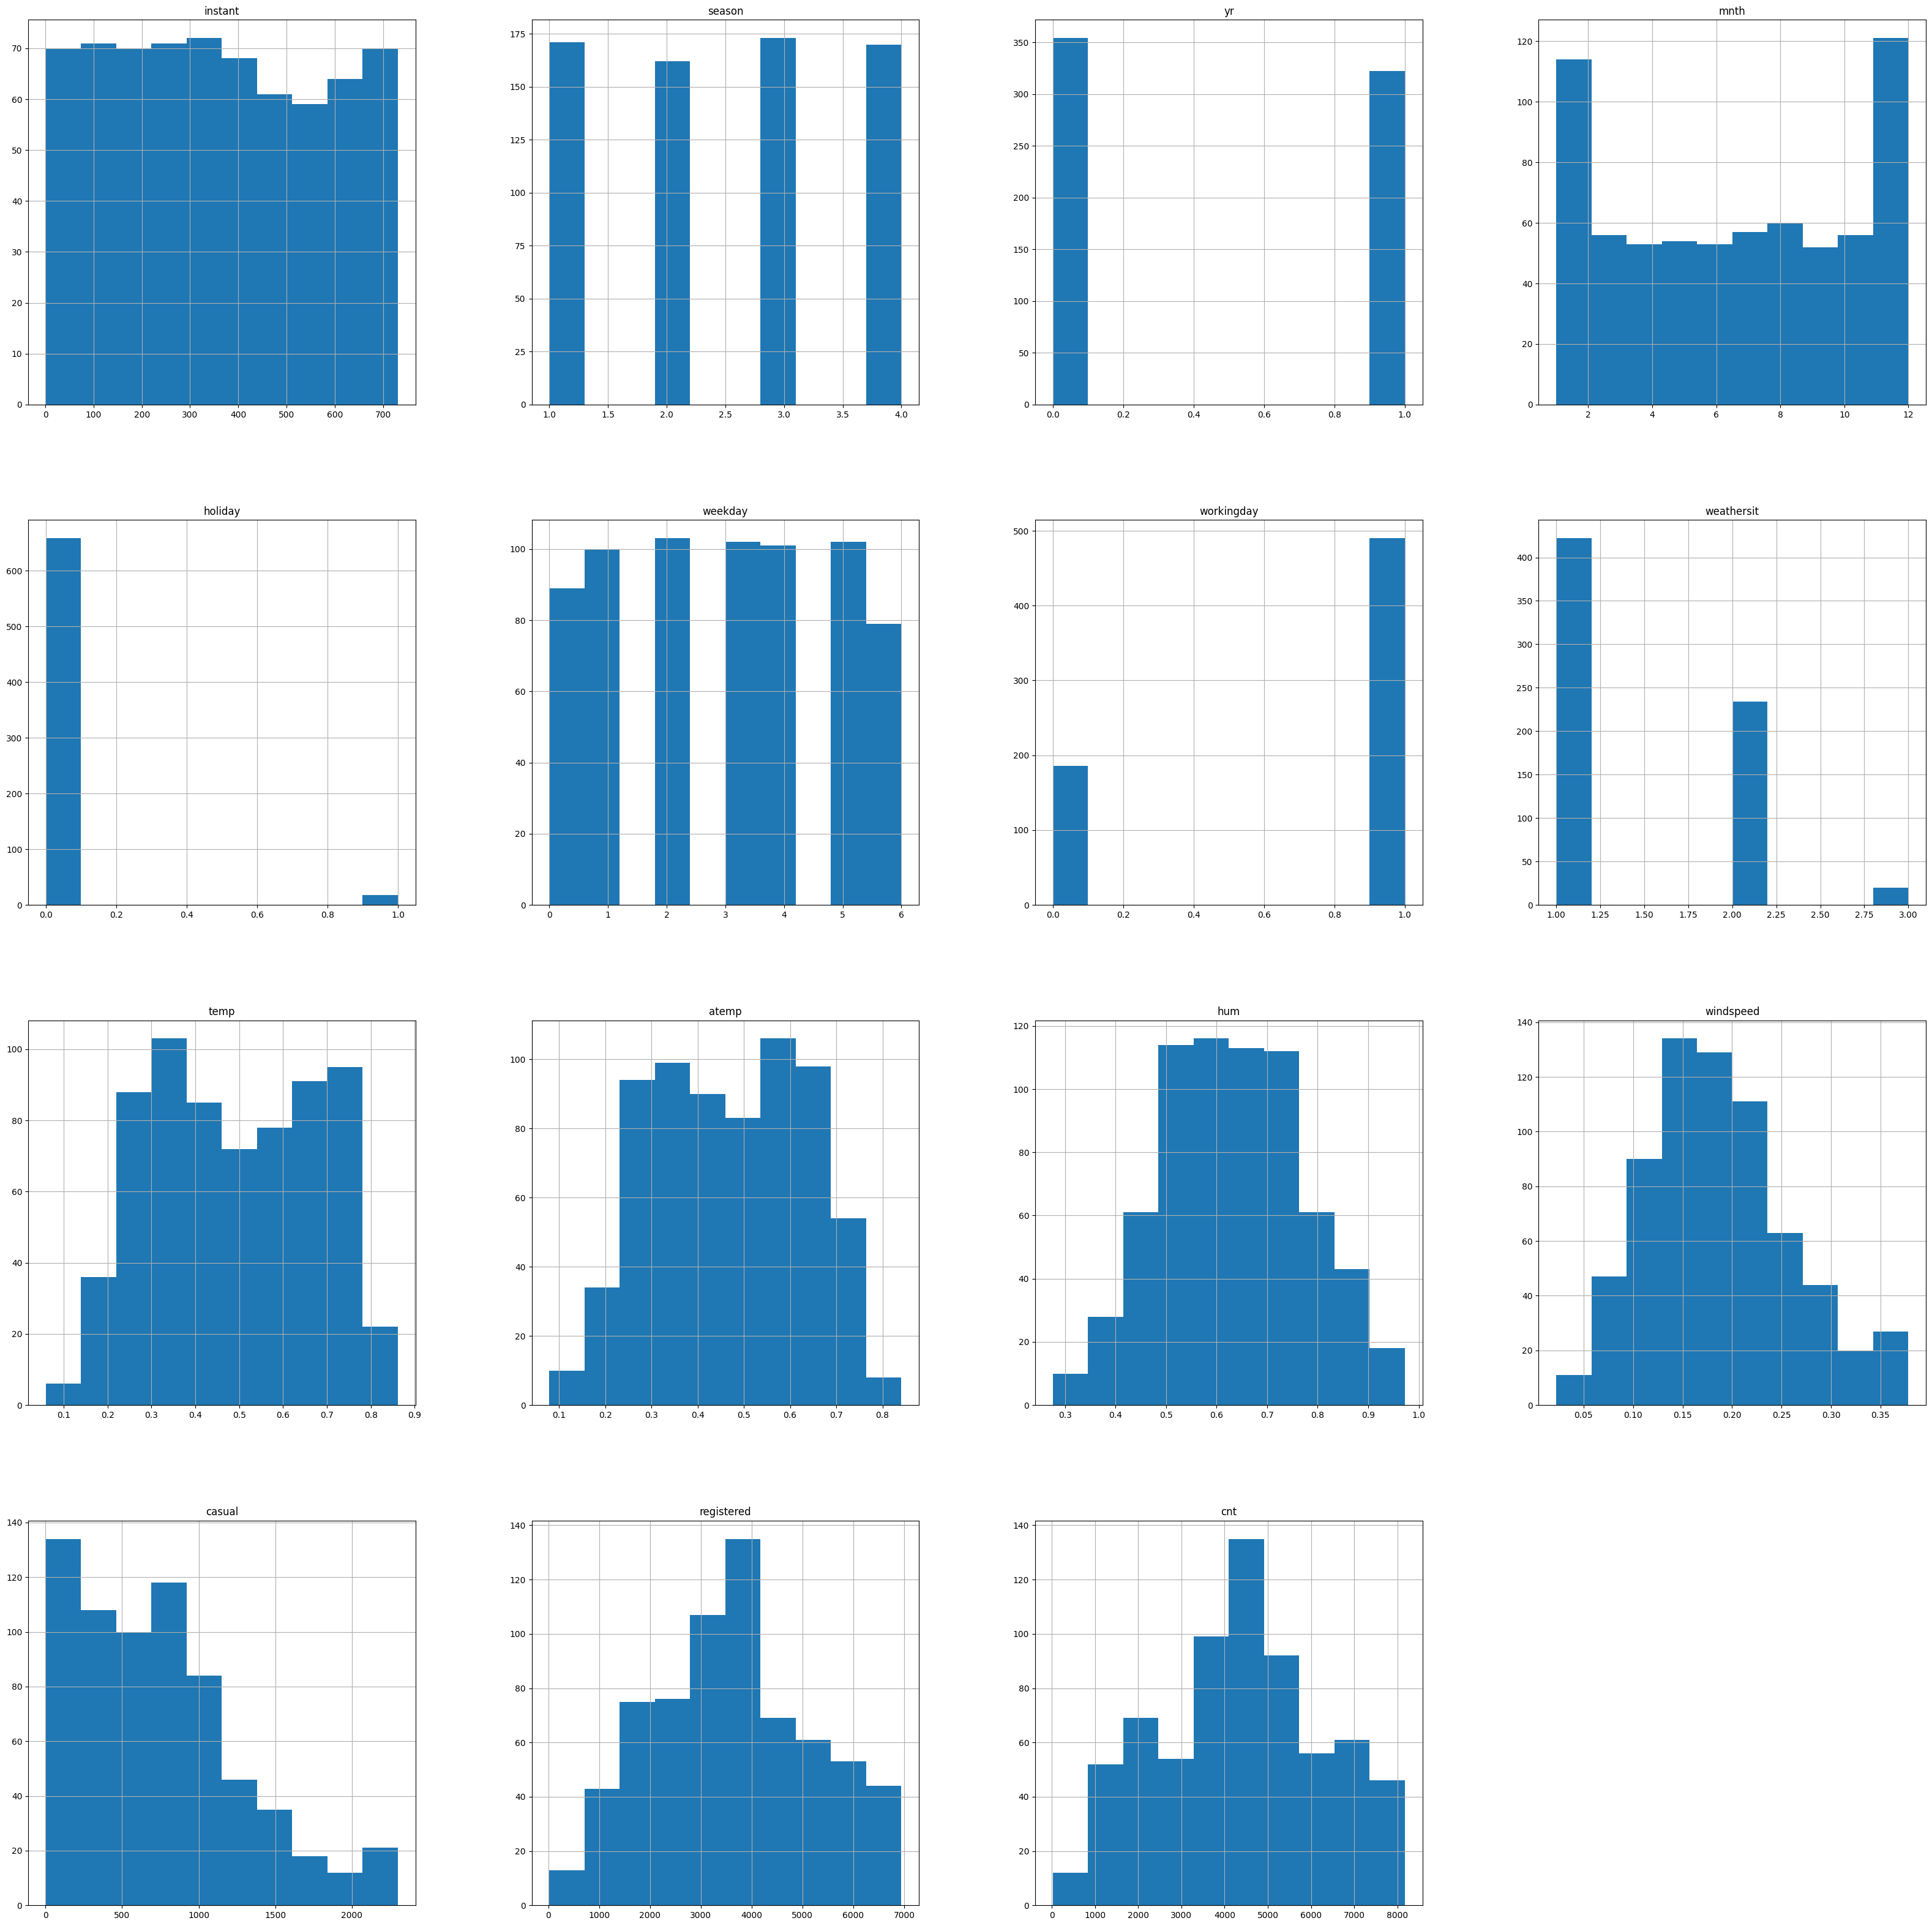

In [28]:
day_df_cleaned.hist(figsize=(40,40))

In [30]:
day_df_cleaned.corr(numeric_only=True)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.420862,0.863050,0.505549,0.017408,-0.029433,0.067973,-0.007556,0.134020,0.136153,0.014537,-0.120537,0.229426,0.656391,0.620926
season,0.420862,1.000000,0.002890,0.832419,-0.017252,0.002843,0.023915,0.020162,0.334232,0.341819,0.186031,-0.214685,0.252269,0.412191,0.420816
yr,0.863050,0.002890,1.000000,0.002493,0.007838,-0.039346,0.076919,-0.035218,0.026739,0.025507,-0.106436,-0.024669,0.176536,0.590977,0.550472
mnth,0.505549,0.832419,0.002493,1.000000,0.020822,0.009110,0.002844,0.046098,0.220457,0.227274,0.208379,-0.198103,0.155690,0.296022,0.294940
holiday,0.017408,-0.017252,0.007838,0.020822,1.000000,-0.096338,-0.268451,-0.038502,-0.063402,-0.067589,-0.022308,0.036288,0.012968,-0.119854,-0.097713
weekday,-0.029433,0.002843,-0.039346,0.009110,-0.096338,1.000000,0.074237,0.041017,-0.008040,-0.016548,-0.028973,0.001894,0.009479,0.034914,0.032250
workingday,0.067973,0.023915,0.076919,0.002844,-0.268451,0.074237,1.000000,0.032589,0.116975,0.115505,0.005369,-0.018343,-0.424353,0.374476,0.195693
weathersit,-0.007556,0.020162,-0.035218,0.046098,-0.038502,0.041017,0.032589,1.000000,-0.117983,-0.119994,0.627611,0.078224,-0.276968,-0.262102,-0.300869
temp,0.134020,0.334232,0.026739,0.220457,-0.063402,-0.008040,0.116975,-0.117983,1.000000,0.991497,0.122406,-0.138183,0.585568,0.542106,0.625918
atemp,0.136153,0.341819,0.025507,0.227274,-0.067589,-0.016548,0.115505,-0.119994,0.991497,1.000000,0.135352,-0.165645,0.584664,0.544994,0.628104


Dari tabel korelasi diatas , factor cuaca yang memiliki hubungan sejajar dengan cnt adalah feature temp dan atemp , dengan atemp lebih besar angka korelasinya

sedangkan factor cuaca yang berlawanan yang memiliki hubungan terbalik dengan cnt adalah feature hum, windspeed, dan weathersit

Kita coba telusuri lebih lanjut terkait keterhubungan factor lain dengan jumlah peminjaman sepedanya

Melihat hubungan Kondisi Cuaca dengan Jumlah peminjaman sepeda pada day_df

In [66]:
day_df_cleaned.groupby('weathersit').agg({
    'cnt': ['mean' , 'max' , 'min']
})

cnt           
                   mean   max  min
weathersit                        
1           4747.104265  8173  431
2           3917.474359  7582  605
3           1862.300000  4639   22

dari tabel diatas menunjukan jika cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy
) memiliki jumlah peminjaman terbanyak dari pada kategori cuaca lainnya.
dan untuk yang paling rendah terdapat pada cuaca 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
)

In [65]:
day_df_cleaned.groupby('weekday').agg({
    'cnt': ['mean' , 'max' , 'min']
})

cnt            
                mean   max   min
weekday                         
0        3876.887640  7333   605
1        4328.310000  7525    22
2        4537.029126  7767   683
3        4532.049020  8173   441
4        4704.900990  7804   431
5        4655.480392  8167  1167
6        3793.696203  7109   627

In [72]:
day_df_cleaned.groupby('workingday').agg({
    'cnt': 'mean'
})

,cnt
workingday,
0,3783.284946
1,4599.024490


Pada hari kerja (senin -jumat/1-5) memiliki rata-rata jumlah peminjaman yang berdekatan
berbeda dengan hari sabtu dan minggu(0 dan 6) yang memiliki rata-rata lebih kecil daripada hari senin-jumat

ini membuktikan kalau hari-hari kerja lebih sering terjadi peminjaman sepeda

In [78]:
day_df_cleaned.groupby('season').agg({
    'cnt': ['mean' , 'max' , 'min'] ,
    'windspeed' : 'mean',
    'hum' :'mean',
    'atemp' : 'mean',
    'temp': 'mean'
})

season          cnt             windspeed       hum     atemp      temp
                 mean   max   min      mean      mean      mean      mean
0      1  2573.122807  6312   431  0.204814  0.593370  0.293980  0.293854
1      2  4777.858025  7736   795  0.202199  0.634340  0.515571  0.538954
2      3  5526.687861  8173  1115  0.172206  0.634391  0.656040  0.706582
3      4  4629.876471  8156    22  0.168583  0.670627  0.411364  0.418489

Dapat dilihat , musim yang rata-rata jumlah peminjamannya paling banyak terletak di musim gugur , disusul dengan musim panas dengan urutan ke 2

kita juga dapat melihat musim-musim diatas didukung juga dengan rata-rata kelembapan di sekitaran 63 persen ,temperatur aktual di rata-rata 20.5 hingga 28.7 , dan feeling temperatur dari 25 hingga 32.5 derajat celcius

MENGEKSPLOR TABEL hour_df

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

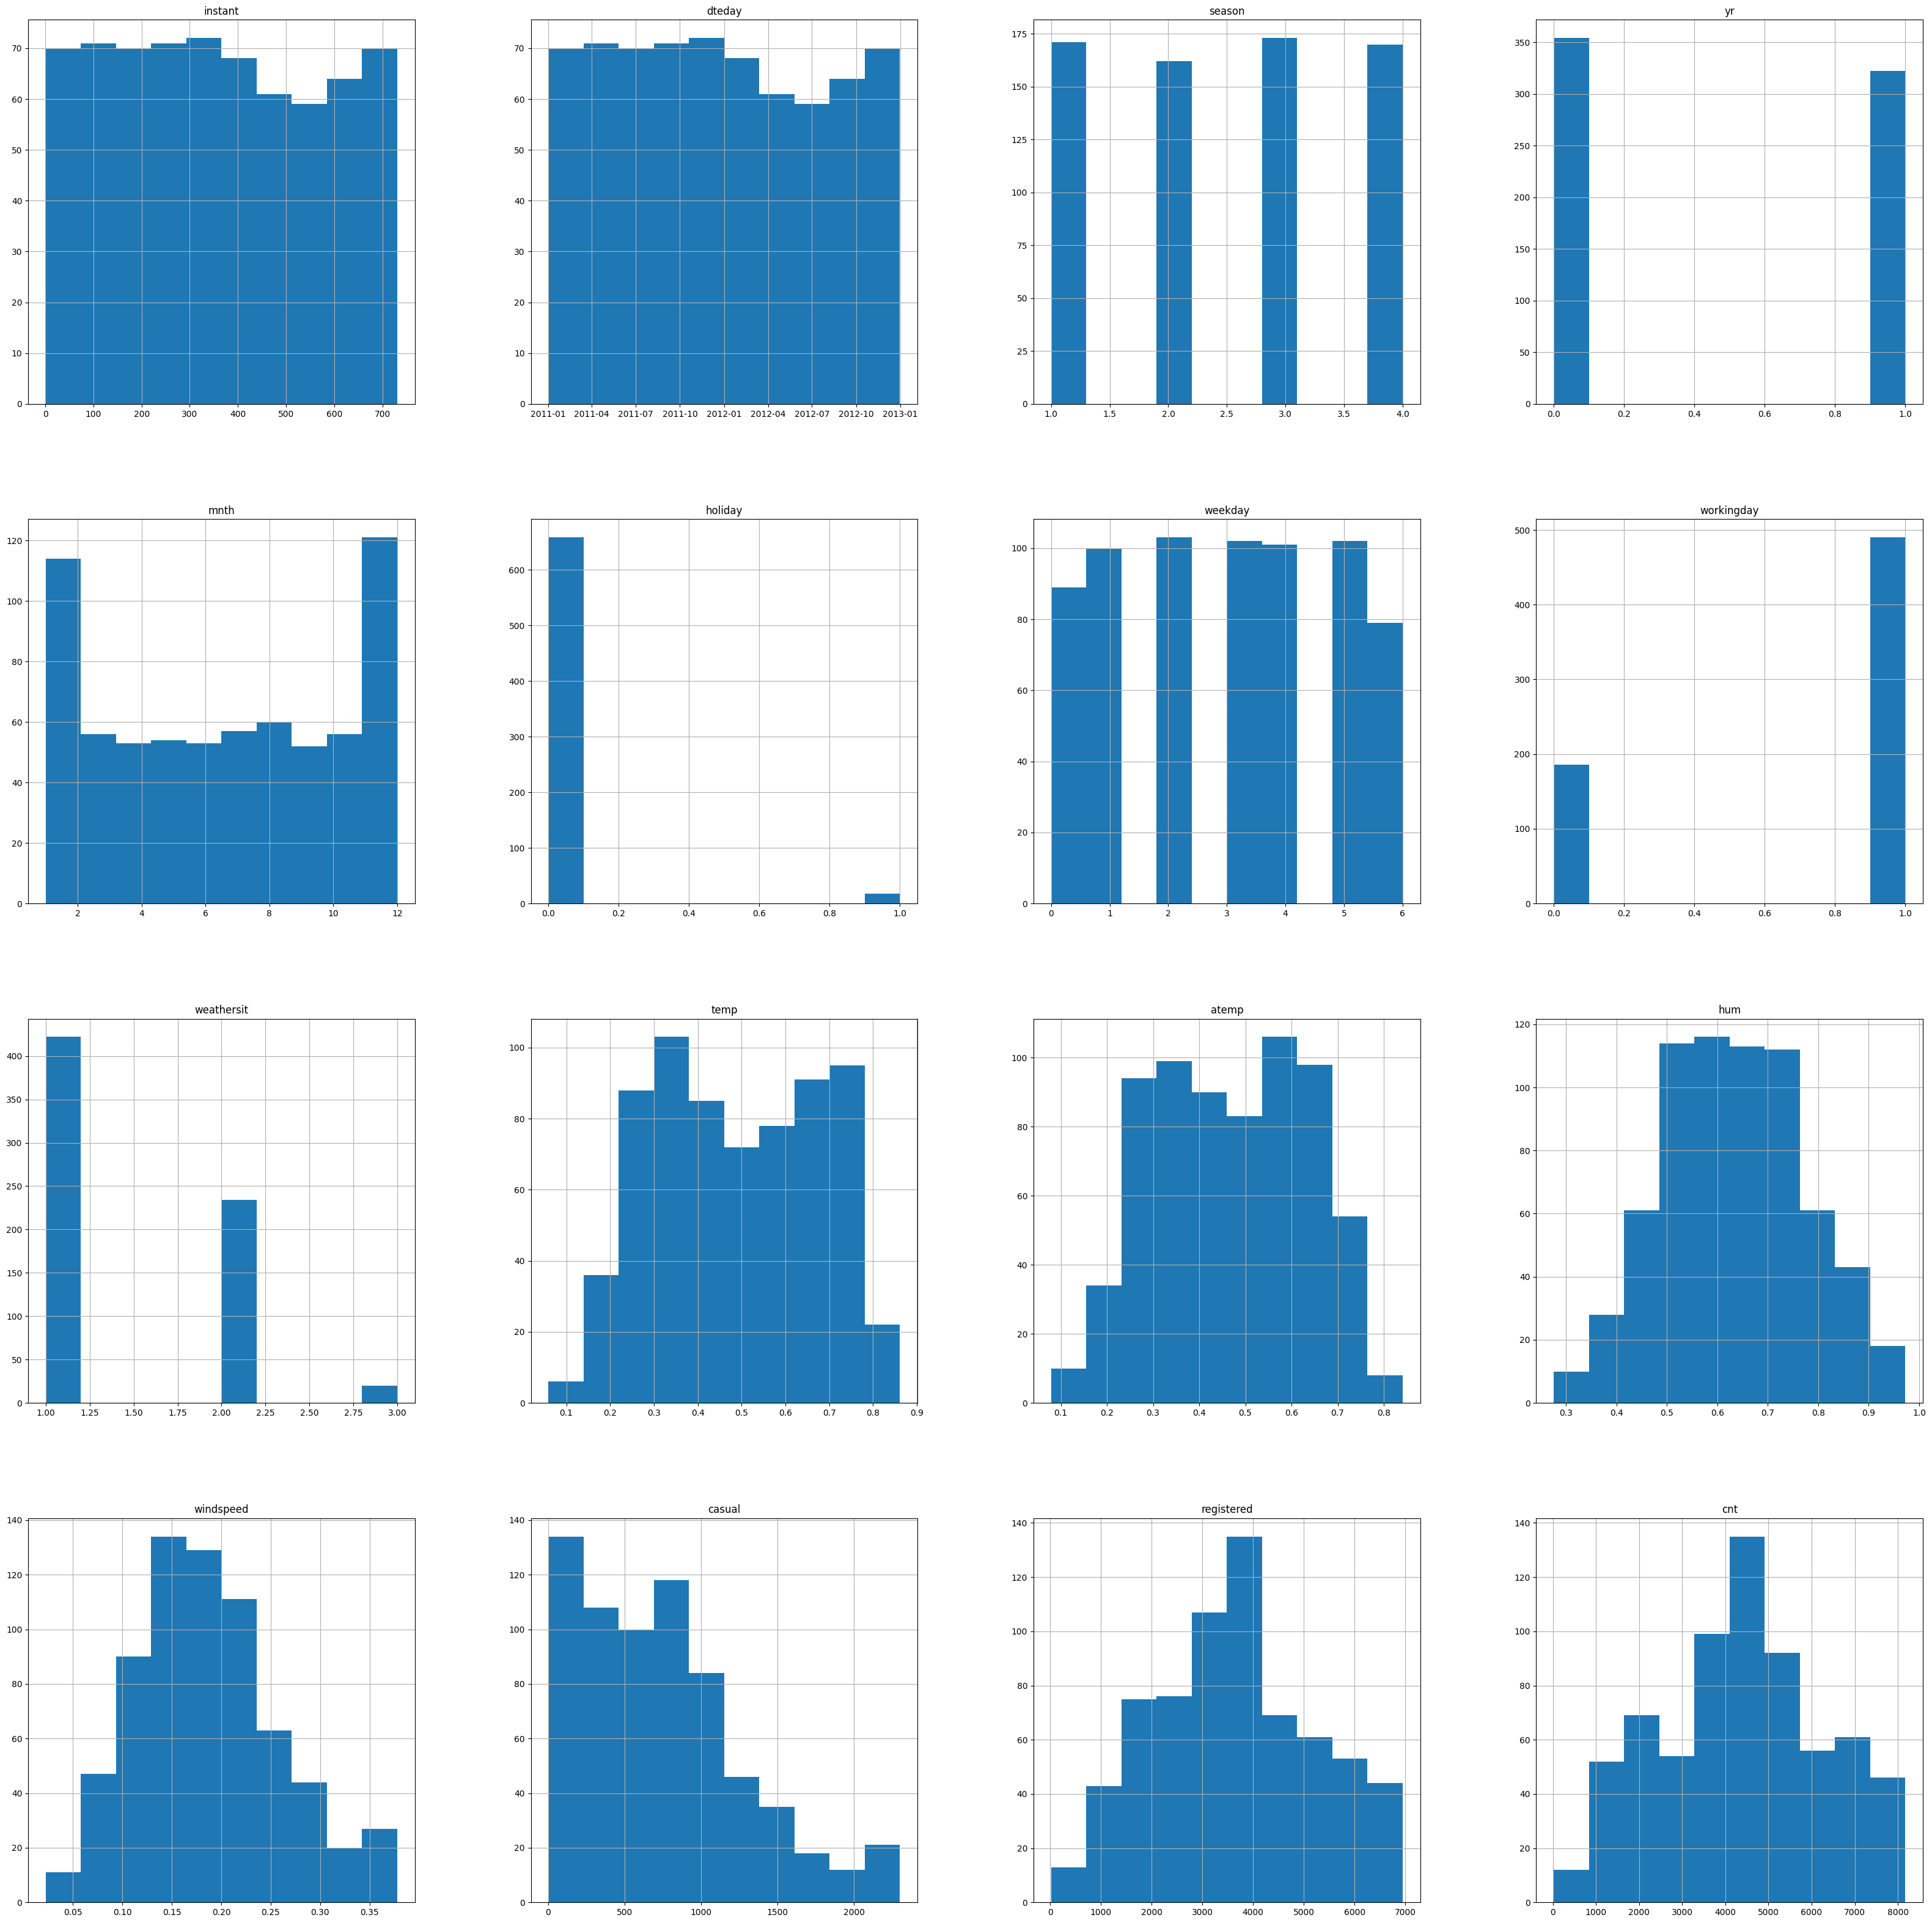

In [87]:
day_df_cleaned.hist(figsize=(40,40))

In [88]:
hour_df_cleaned.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.402445,0.859269,0.496477,-0.025281,0.018122,-0.006845,-0.005338,0.000220,0.122554,0.124006,0.031195,-0.086732,0.130576,0.200086,0.199539
dteday,0.999995,1.000000,0.402905,0.858875,0.497150,-0.026697,0.018124,-0.006808,-0.005299,0.000325,0.122594,0.124074,0.031809,-0.086831,0.130094,0.199575,0.198996
season,0.402445,0.402905,1.000000,-0.020230,0.825340,-0.018404,-0.019699,-0.000834,0.025639,-0.012502,0.323848,0.329796,0.162901,-0.137747,0.145083,0.166303,0.173725
yr,0.859269,0.858875,-0.020230,1.000000,-0.015447,-0.025077,0.013092,-0.013557,-0.008202,-0.002798,0.016916,0.015537,-0.064097,-0.026596,0.096658,0.159789,0.157709
mnth,0.496477,0.497150,0.825340,-0.015447,1.000000,-0.010235,0.012811,0.010167,0.003103,0.004955,0.211536,0.217278,0.170170,-0.126111,0.091660,0.121170,0.123550
hr,-0.025281,-0.026697,-0.018404,-0.025077,-0.010235,1.000000,-0.002204,-0.006895,0.027469,-0.002066,0.091804,0.090072,-0.248478,0.120354,0.375962,0.437699,0.455966
holiday,0.018122,0.018124,-0.019699,0.013092,0.012811,-0.002204,1.000000,-0.098527,-0.264184,-0.016512,-0.055972,-0.059969,-0.011182,0.019634,0.000075,-0.054590,-0.046746
weekday,-0.006845,-0.006808,-0.000834,-0.013557,0.010167,-0.006895,-0.098527,1.000000,0.048040,-0.001111,0.001875,-0.004126,-0.021278,0.001303,0.020707,0.036988,0.036147
workingday,-0.005338,-0.005299,0.025639,-0.008202,0.003103,0.027469,-0.264184,0.048040,1.000000,0.030102,0.132532,0.130970,-0.036080,0.005874,-0.093545,0.190113,0.142693
weathersit,0.000220,0.000325,-0.012502,-0.002798,0.004955,-0.002066,-0.016512,-0.001111,0.030102,1.000000,-0.083075,-0.087948,0.424287,0.036405,-0.141415,-0.089351,-0.107017


Feature yang menjadi pembeda tabel hour_df dengan day_df adalah adanya feature hr atau jam untuk per harinya.

Jika dilihat dari tabel diatas , untuk feature hr ini cukup memiliki hubungan dengan jumlah peminjamannya.

In [89]:
hour_df_cleaned.groupby('hr').agg({
    'cnt': 'mean'
})

,cnt
hr,
0,54.069348
1,33.566852
2,22.947740
3,11.783745
4,6.414847
5,19.907173
6,76.108484
7,183.153030
8,225.719335


dilihat dari tabel pivot diatas , di jam 8 dan jam 18 menjadi puncak jika dilihat dari histori dari jam-jam sebelumnya

di jam ini pula biasanya merupakan jam berangkat kerja dan pulang kerja

- Adanya Pola antara Faktor-Faktor lingkungan (seperti kondisi cuaca , kecepatan angin , dan kelembapan) yang mempengaruhi jumlah peminjaman sepeda.
- Ada juga faktor-faktor waktu khusus yang dimana terjadi pelonjakan ataupun penurunan peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [82]:
grouped_df = day_df_cleaned.groupby('weekday').agg({
    'cnt': ['mean', 'max', 'min']
}).reset_index()


grouped_df.columns = ['weekday', 'mean_cnt', 'max_cnt', 'min_cnt']

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


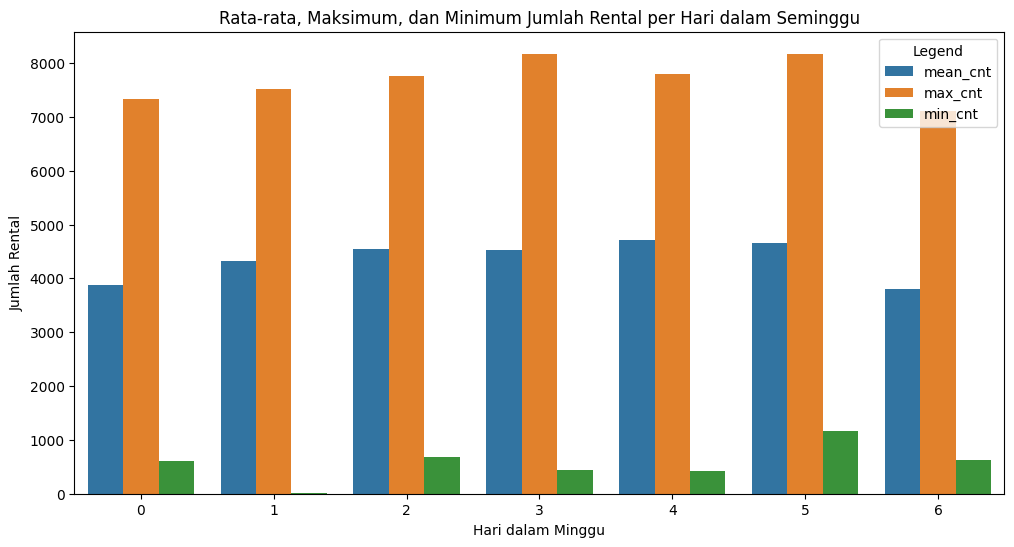

In [84]:
plt.figure(figsize=(12, 6))

#rata-rata, maksimum, dan minimum
sns.barplot(data=grouped_df.melt(id_vars='weekday', var_name='statistic', value_name='cnt_value'),
             x='weekday', y='cnt_value', hue='statistic')


plt.title('Rata-rata, Maksimum, dan Minimum Jumlah Rental per Hari dalam Seminggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Rental')
plt.legend(title='Legend')
plt.show()

In [85]:
grouped_df = day_df_cleaned.groupby('season').agg({
    'cnt': ['mean', 'max', 'min'],
    'windspeed': 'mean',
    'hum': 'mean',
    'atemp': 'mean',
    'temp': 'mean'
}).reset_index()


grouped_df.columns = ['season', 'mean_cnt', 'max_cnt', 'min_cnt',
                      'mean_windspeed', 'mean_hum', 'mean_atemp', 'mean_temp']

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

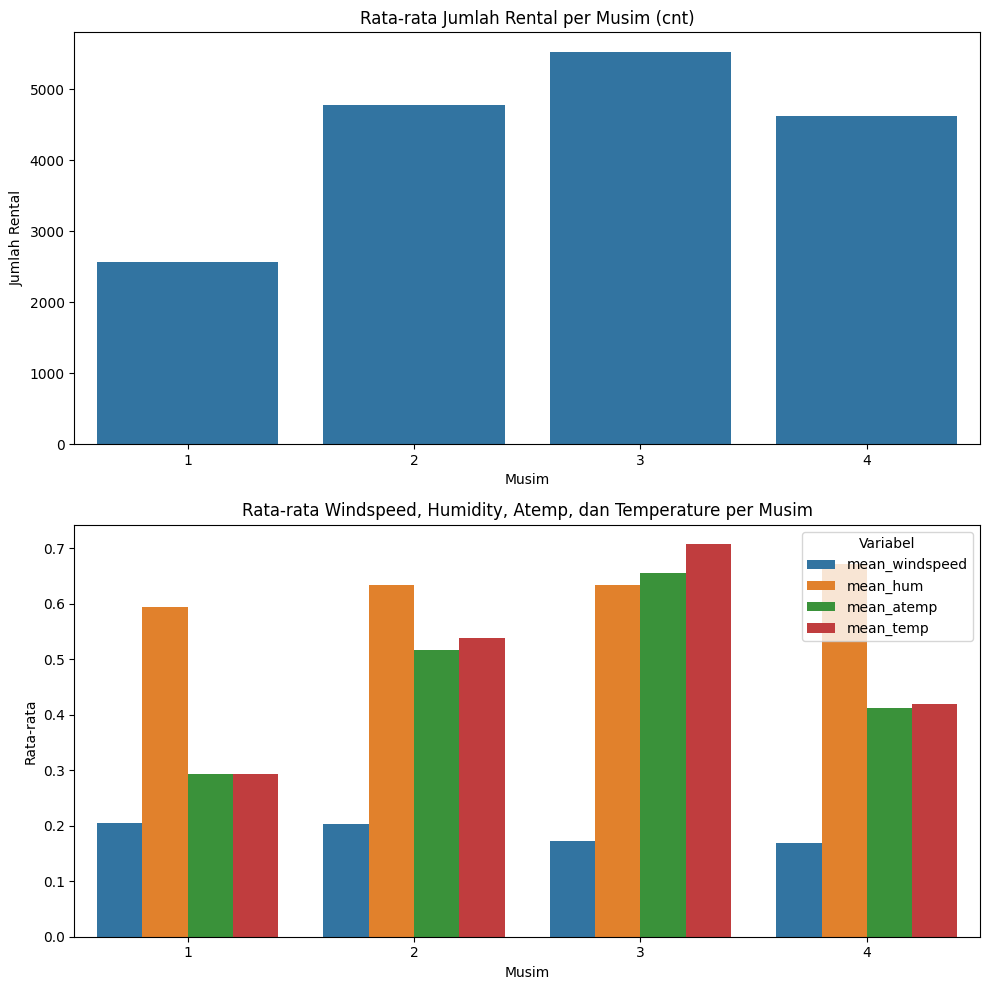

In [86]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# rata-rata jumlah rental
sns.barplot(data=grouped_df, x='season', y='mean_cnt', ax=axes[0])
axes[0].set_title('Rata-rata Jumlah Rental per Musim (cnt)')
axes[0].set_xlabel('Musim')
axes[0].set_ylabel('Jumlah Rental')

# rata-rata windspeeed, hum, atemp, dan temp
sns.barplot(data=grouped_df.melt(id_vars='season',
                                   value_vars=['mean_windspeed', 'mean_hum', 'mean_atemp', 'mean_temp'],
                                   var_name='variable', value_name='value'),
             x='season', y='value', hue='variable', ax=axes[1])
axes[1].set_title('Rata-rata Windspeed, Humidity, Atemp, dan Temperature per Musim')
axes[1].set_xlabel('Musim')
axes[1].set_ylabel('Rata-rata')

axes[1].legend(title='Variabel')
plt.tight_layout()
plt.show()

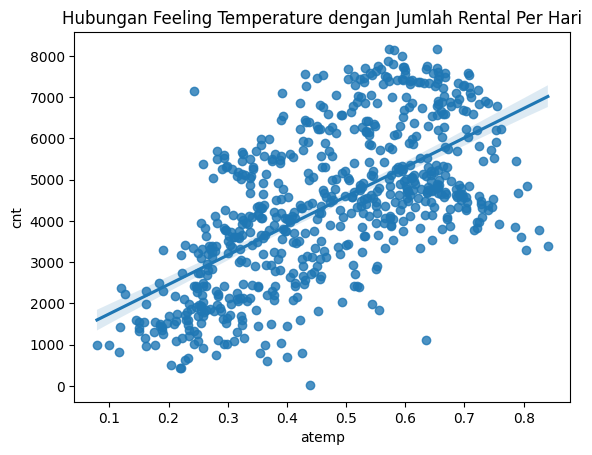

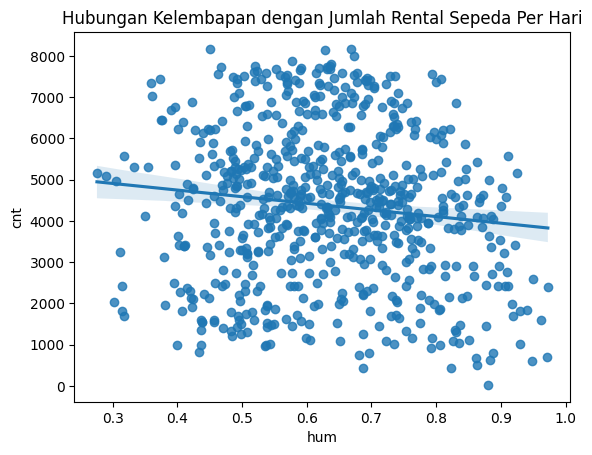

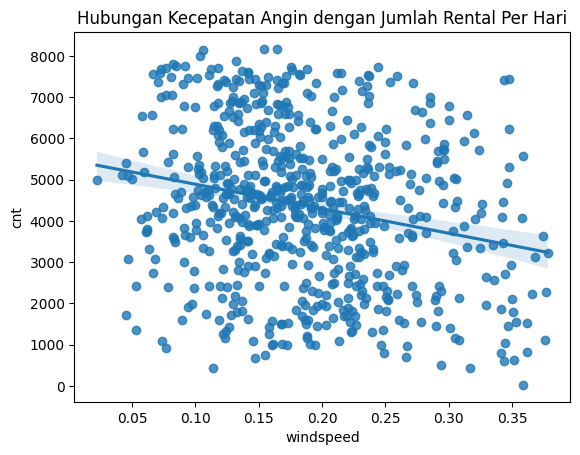

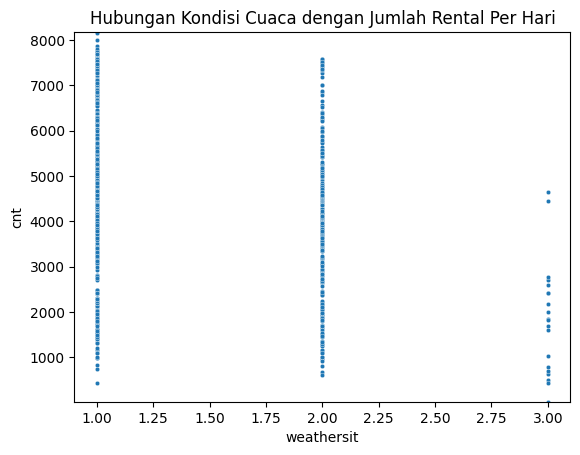

In [58]:
sns.regplot(x='atemp', y='cnt', data=day_df_cleaned)
plt.title('Hubungan Feeling Temperature dengan Jumlah Rental Per Hari')
plt.show()

# Analisis pengaruh cuaca lain (kelembaban dan kecepatan angin)
sns.regplot(x='hum', y='cnt', data=day_df_cleaned)
plt.title('Hubungan Kelembapan dengan Jumlah Rental Sepeda Per Hari')
plt.show()

sns.regplot(x='windspeed', y='cnt', data=day_df_cleaned)
plt.title('Hubungan Kecepatan Angin dengan Jumlah Rental Per Hari')
plt.show()

sns.scatterplot(x='weathersit', y='cnt', data=day_df_cleaned , s=10)
plt.title('Hubungan Kondisi Cuaca dengan Jumlah Rental Per Hari')
y_min = day_df_cleaned['cnt'].min()
y_max = day_df_cleaned['cnt'].max()
plt.ylim(y_min, y_max)
plt.show()

### Pertanyaan 2:

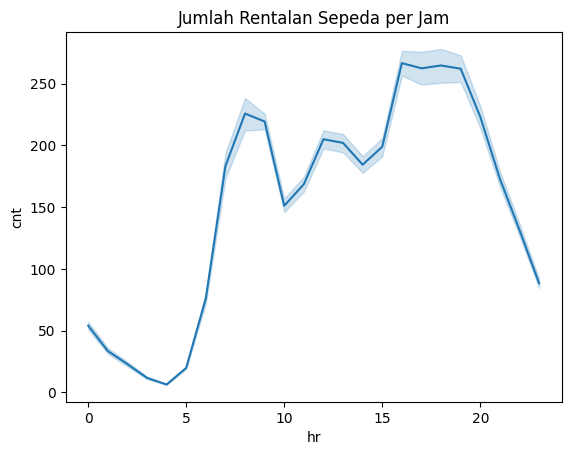

In [25]:
sns.lineplot(x='hr', y='cnt', data=hour_df_cleaned)
plt.title('Jumlah Rentalan Sepeda per Jam')
plt.show()

**Insight:**
**Insight:**
- Peminjaman Sepeda Mengalami Peningkatan di Musim-Musim yang cenderung memiliki cuaca cerah/berawan ,suhu hangat , kecepatan angin yang tidak kencang , serta kelembapan yang sedang.
- Peminjaman Sepeda juga Mengalami Peningkatan pada hari-hari kerja dan pada jam-jam berangkat dan pulang kerja.
-Sebaliknya , Peminjaman Sepeda mengalami penurunan di Musim-musim yang cenderung memiliki cuaca mendung/berkabut/hujan ,suhu yang terlalu panas/dingin,kecepatan angin yang kencang, dan tingkat kelembapan yang kering/terlalu basah.

## Analisis Lanjutan (Opsional)

## Conclusion

-  Peminjaman sepeda sangat dipengaruhi oleh faktor lingkungan. Cuaca cerah, suhu hangat, kecepatan angin rendah, dan kelembapan sedang dapat meningkatkan tingkat penyewaan. Sebaliknya, kondisi buruk seperti mendung, hujan, suhu ekstrem, angin kencang, dan kelembapan yang tidak nyaman cenderung mengurangi jumlah peminjaman. Hal ini menunjukkan bahwa pengguna lebih memilih bersepeda saat cuaca nyaman.


-  Peminjaman sepeda menunjukkan pola yang jelas terkait waktu, terutama pada hari kerja. Tingkat penyewaan meningkat saat jam sibuk, seperti saat berangkat dan pulang kerja, karena banyak pengguna memanfaatkan sepeda untuk perjalanan harian. Ini menunjukkan bahwa sepeda menjadi pilihan transportasi yang efisien dan praktis selama jam sibuk, sementara di luar jam kerja, tingkat penyewaan cenderung menurun.